In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Practice_car_Data.csv')

In [4]:
df.head()

,Car ID,Estimated Cost,Mileage(kmpl),Engine(CC),Purchased
0,15624510,19000,26.60,998.0,0
1,15810944,20000,19.67,1582.0,0
2,15668575,43000,18.20,1199.0,0
3,15603246,57000,20.77,1248.0,0
4,15804002,76000,15.20,1968.0,0


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car ID          400 non-null    int64  
 1   Estimated Cost  400 non-null    int64  
 2   Mileage(kmpl)   400 non-null    float64
 3   Engine(CC)      400 non-null    float64
 4   Purchased       400 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.8 KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [11]:
# since car Id is not worthy feature to effect the purchasing so it is not useful for us . So remove this column
df.drop(columns=['Car ID'],inplace = True)

In [12]:
df.head()

,Estimated Cost,Mileage(kmpl),Engine(CC),Purchased
0,19000,26.60,998.0,0
1,20000,19.67,1582.0,0
2,43000,18.20,1199.0,0
3,57000,20.77,1248.0,0
4,76000,15.20,1968.0,0


In [152]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 42)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
X_train_scaled[1:5]

array([[-1.22993871,  0.50378857, -0.23443574],
       [ 1.853544  , -0.78876954, -0.36237838],
       [-0.90995465,  0.11040132, -0.70656209],
       [-1.28811763,  1.06577036, -0.61826365]])

In [168]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [198]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = 3))

model.add(Dense(32,activation='relu'))

#adding output layer with one node
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
# as it is binary class problem so binary crossentropy

In [201]:
model.fit(X_train_scaled,y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3589 - loss: 0.7104
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6878 - loss: 0.6665 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7573 - loss: 0.6285 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7733 - loss: 0.6120 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8248 - loss: 0.5642  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7680 - loss: 0.5900 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8033 - loss: 0.5318 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7816 - loss: 0.5350 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7847 - loss: 0.5321 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 0.5789 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7745 - loss: 0.5444 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [202]:
model.layers[0].get_weights()

[array([[-8.79028291e-02,  1.44558370e-01,  2.19454840e-02,
          3.20629179e-01, -2.01697648e-01, -4.11203414e-01,
          2.58194864e-01,  3.53146285e-01,  3.67040694e-01,
          5.19062765e-02,  3.75066042e-01, -3.21459144e-01,
         -1.07411623e-01, -1.18773140e-01,  2.62567461e-01,
          1.85047671e-01, -2.39267722e-01, -4.05791141e-02,
         -1.18516885e-01, -4.47206991e-03,  1.18256956e-01,
          1.26344830e-01,  3.70895505e-01,  2.29868099e-01,
          6.27746386e-03, -3.23327065e-01,  2.72392929e-01,
          3.72209519e-01, -3.29435945e-01,  3.74308646e-01,
          1.99009050e-02, -1.01516128e-01,  2.37835765e-01,
          4.18299407e-01, -1.78501546e-01,  2.92327195e-01,
         -3.91612612e-02,  3.24010789e-01,  5.69574796e-02,
          3.96583118e-02,  4.20180380e-01, -2.47196004e-01,
         -3.93064976e-01, -2.74976611e-01,  1.85940996e-01,
         -1.19817309e-01, -2.65355468e-01, -2.60752261e-01,
         -6.17357977e-02, -2.42893890e-0

In [203]:
model.layers[1].get_weights()

[array([[-0.13211362,  0.14589728,  0.24322137, ..., -0.17423296,
         -0.2240893 ,  0.19596486],
        [-0.08839979,  0.18350603,  0.2781759 , ...,  0.20231532,
         -0.02336931,  0.18110175],
        [-0.19904056,  0.3235288 ,  0.17578326, ..., -0.05266555,
          0.09134971,  0.10241529],
        ...,
        [-0.0086502 ,  0.00857597, -0.1312894 , ..., -0.13003843,
          0.0755511 ,  0.22972158],
        [ 0.14287758, -0.17466906, -0.3581583 , ...,  0.31288135,
         -0.10591564,  0.17317042],
        [ 0.29821435, -0.2934804 , -0.17796537, ...,  0.30437136,
          0.12881903,  0.2711651 ]], dtype=float32),
 array([ 0.04132227,  0.1495147 ,  0.13114211, -0.02809754,  0.06112961,
         0.07124241, -0.01728804,  0.01598972,  0.13247931, -0.01604365,
         0.19784452,  0.11660361, -0.06163276,  0.04833479, -0.0184996 ,
        -0.03277011, -0.03414286, -0.00168901,  0.10113084,  0.11275273,
         0.11026782, -0.01490448,  0.12939027,  0.17196396, -0.064

In [204]:
y_log = model.predict(X_test_scaled)
y_log[0:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.4770495 ],
       [0.4067244 ],
       [0.47666952],
       [0.66251916],
       [0.45782974]], dtype=float32)

In [205]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred[0:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # actual , predicted

0.75

In [207]:
history = model.fit(X_train_scaled, y_train, epochs = 100 , validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8341 - loss: 0.3920 - val_accuracy: 0.7969 - val_loss: 0.4958
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8105 - loss: 0.4127 - val_accuracy: 0.7969 - val_loss: 0.5105
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8406 - loss: 0.4183 - val_accuracy: 0.7969 - val_loss: 0.5067
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8210 - loss: 0.4170 - val_accuracy: 0.7969 - val_loss: 0.5071
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8063 - loss: 0.4336 - val_accuracy: 0.7969 - val_loss: 0.5069
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8057 - loss: 0.4309 - val_accuracy: 0.7969 - val_loss: 0.5153
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8332 - loss: 0.4061 - val_accuracy: 0.7969 - val_loss: 0.5225
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8038 - loss: 0.4495 - val_accuracy: 0.7969 - val_loss:

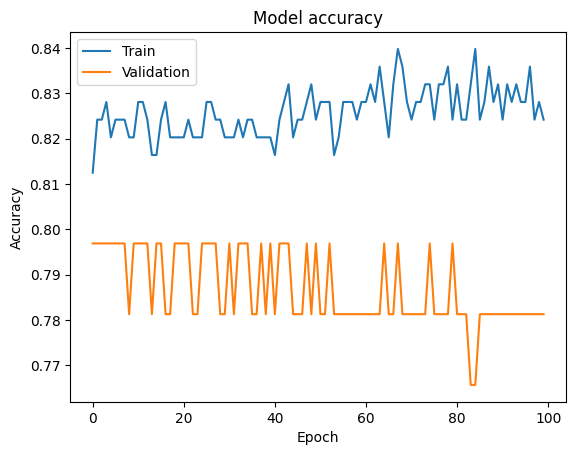

In [210]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


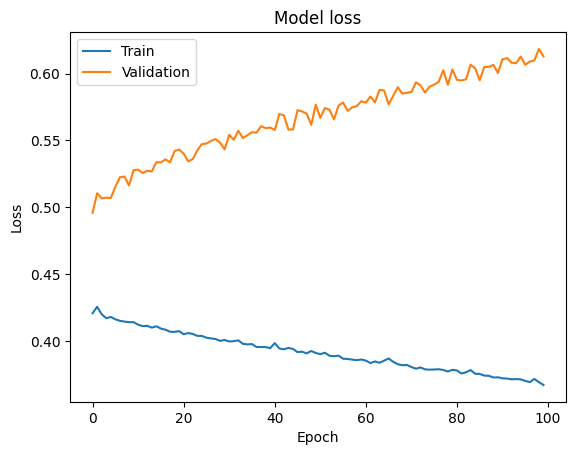

In [209]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [211]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        52
           1       0.79      0.39      0.52        28

    accuracy                           0.75        80
   macro avg       0.76      0.67      0.68        80
weighted avg       0.76      0.75      0.72        80



In [212]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  3],
       [17, 11]])